# Weather in Australia analysis

#### Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data display settings

In [2]:
pd.set_option('precision', 1)
pd.options.display.max_columns = 20
%matplotlib inline

### Data loading

Loading of all columns from the CSV file uses nearly 60MB of memory so I've decided to load only necessary columns 

In [3]:
path = './weatherAUS.csv'
weather_data = pd.read_csv(path, usecols = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 
                                            'Humidity3pm', 'Pressure9am', 'Pressure3pm'])
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0


### Preparing data after load

#### Showing data types in each column and total memory usage

In [4]:
weather_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 9 columns):
Date           142193 non-null object
Location       142193 non-null object
MinTemp        141556 non-null float64
MaxTemp        141871 non-null float64
Rainfall       140787 non-null float64
Humidity9am    140419 non-null float64
Humidity3pm    138583 non-null float64
Pressure9am    128179 non-null float64
Pressure3pm    128212 non-null float64
dtypes: float64(7), object(2)
memory usage: 25.6 MB


#### To reduce memory usage I've decided to change data type for each column

In [5]:
weather_data['Date'] = weather_data['Date'].astype('datetime64')
weather_data['Location'] = weather_data['Location'].astype('category')
weather_data['MinTemp'] = weather_data['MinTemp'].astype('float32')
weather_data['MaxTemp'] = weather_data['MaxTemp'].astype('float32')
weather_data['Rainfall'] = weather_data['Rainfall'].astype('float32')
weather_data['Humidity9am'] = weather_data['Humidity9am'].astype('float32')
weather_data['Humidity3pm'] = weather_data['Humidity3pm'].astype('float32')
weather_data['Pressure9am'] = weather_data['Pressure9am'].astype('float32')
weather_data['Pressure3pm'] = weather_data['Pressure3pm'].astype('float32')

In [6]:
weather_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 9 columns):
Date           142193 non-null datetime64[ns]
Location       142193 non-null category
MinTemp        141556 non-null float32
MaxTemp        141871 non-null float32
Rainfall       140787 non-null float32
Humidity9am    140419 non-null float32
Humidity3pm    138583 non-null float32
Pressure9am    128179 non-null float32
Pressure3pm    128212 non-null float32
dtypes: category(1), datetime64[ns](1), float32(7)
memory usage: 5.0 MB


Memory usage has dropped from 25.6 MB to 5.0 MB

### Cleaning up the data

In [7]:
# Findind NAN values
weather_data[weather_data.isna().any(axis=1)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
14,2008-12-16,Albury,9.8,27.7,NaN,50.0,28.0,1013.4,1010.3
282,2009-09-11,Albury,NaN,18.8,NaN,83.0,46.0,1022.2,1018.2
433,2010-02-10,Albury,21.7,35.6,NaN,64.0,28.0,1018.8,1014.7
434,2010-02-12,Albury,22.5,29.1,NaN,81.0,67.0,1008.5,1007.8
439,2010-02-18,Albury,NaN,31.2,NaN,33.0,24.0,1020.4,1019.1
...,...,...,...,...,...,...,...,...,...
141678,2016-01-21,Uluru,22.4,37.0,NaN,81.0,40.0,1010.9,1006.2
141689,2016-02-03,Uluru,20.6,32.6,NaN,50.0,32.0,1011.5,1008.7
141693,2016-02-08,Uluru,23.8,38.3,NaN,27.0,16.0,1015.2,1010.8
141828,2016-06-24,Uluru,3.2,17.9,NaN,83.0,39.0,1022.4,1019.0


There is 17920 rows (approx. 12% of all rows) containing NaN values so I've decided to replace all NaNs with 'forward fill' method.

In [8]:
weather_data.fillna(method = 'ffill', inplace = True)

### Data extension with additional columns

#### Adding 'year', 'month' and 'average humidity' column

In [9]:
weather_data['Year'] = weather_data['Date'].dt.year.astype('int16')
weather_data['Month'] = weather_data['Date'].dt.month.astype('int16')
weather_data['AvgHumidity'] = (weather_data['Humidity9am'] + weather_data['Humidity3pm'])/2
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Year,Month,AvgHumidity
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,2008,12,46.5
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,2008,12,34.5
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,2008,12,34.0
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,2008,12,30.5
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,2008,12,57.5


## Data exploration

##### Question 1: Which city has the highest average amount of rain during about 10 years of weather observations? What is the average humidity level in each city?

In [10]:
question1_df = weather_data[['Location', 'Rainfall', 'AvgHumidity']]
question1_df.groupby(['Location']).sum()/10  #10 years of observations

,Rainfall,AvgHumidity
Location,,
Adelaide,488.2,16131.2
Albany,681.9,21581.2
Albury,577.3,18367.7
AliceSprings,272.9,9651.5
BadgerysCreek,648.6,18826.4
Ballarat,513.9,21323.1
Bendigo,491.3,17752.1
Brisbane,997.7,18631.6
Cairns,1718.9,19658.0


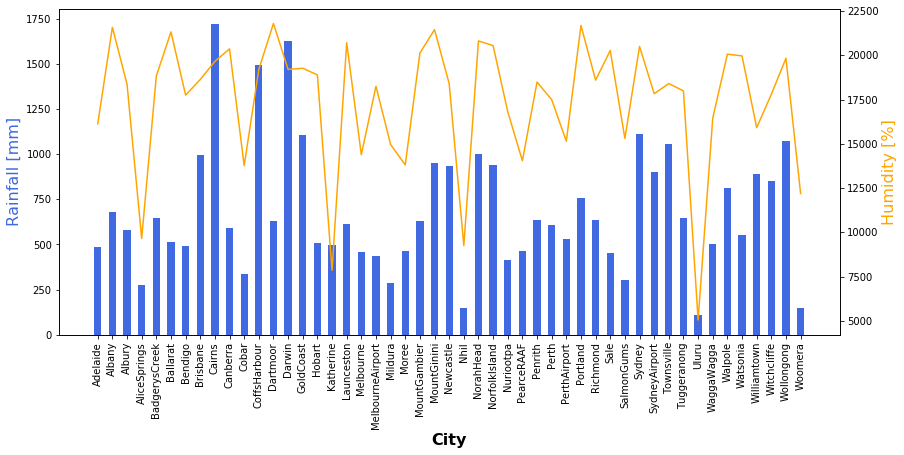

In [11]:
keys = [city for city, df in question1_df.groupby(['Location'])]

rainfall = question1_df.groupby(['Location']).sum()['Rainfall']/10
humidity = question1_df.groupby(['Location']).sum()['AvgHumidity']/10
location = question1_df['Location'].unique()

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.bar(keys, rainfall, width = 0.5, color = 'royalblue')
ax1.set_xlabel('City', size=16, weight='bold')
ax1.set_ylabel('Rainfall [mm]', size=16, color='royalblue')
ax1.set_xticklabels(keys,  rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(keys, humidity, color = 'orange')
ax2.set_ylabel('Humidity [%]', size=16, color='orange')

plt.show()

##### Question 2: What is average min and max temperature in Brisbane in each month?

In [12]:
city_condition = weather_data['Location'] == 'Brisbane'

question2_df = weather_data[['Location', 'Month', 'MinTemp', 'MaxTemp']][city_condition]

question2_df.groupby(['Month']).mean()

,MinTemp,MaxTemp
Month,,
1,21.7,30.4
2,21.6,30.5
3,20.5,29.2
4,17.5,27.2
5,14.0,24.4
6,12.1,21.7
7,10.7,21.6
8,11.0,23.3
9,14.0,25.4


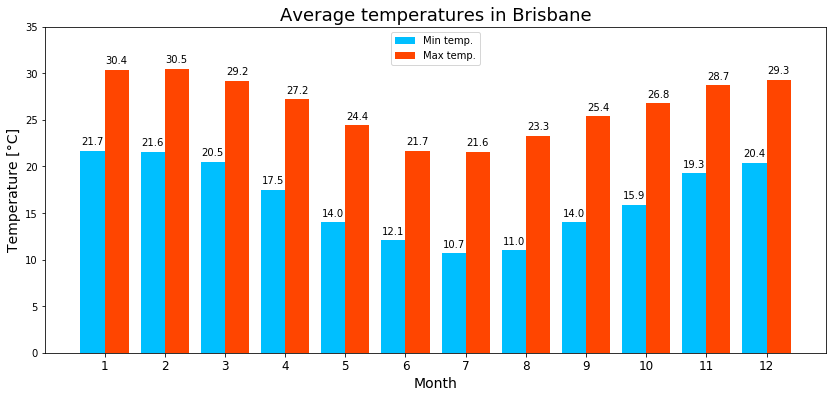

In [13]:
month = range(1,13)
min_temp = [round(n, 1) for n in (question2_df.groupby(['Month']).mean()['MinTemp'])]
max_temp = [round(m, 1) for m in (question2_df.groupby(['Month']).mean()['MaxTemp'])]

x = np.arange(len(month))
width = 0.6

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/3, min_temp, label='Min temp.', color='deepskyblue', width=0.4)
rects2 = ax.bar(x + width/3, max_temp, label='Max temp.', color='orangered', width=0.4)

ax.set_xlabel('Month', size = 14)
ax.set_ylabel('Temperature [\u00b0C]', size = 14)
ax.set_xticks(x)
ax.set_yticks([i for i in range(0,40,5)])
ax.set_xticklabels(month, size=12)
ax.set_title('Average temperatures in Brisbane', size=18)
ax.legend(loc='upper center')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 4 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()